---
title: 'Chapter 1: What is an image?'
jupyter: python3
format:
  html:
    embed-resources: true
  pdf:
    documentclass: article
    toc: true
---


# What is an image?

An image is a static snapshot of an object.  Let us start with an analog image
and work through understating a digital image. An example of an analog image is
a photograph taken with an old fashioned camera on a physical photosensitive
film.  If we were to take a large magnifying glass and zoom in on a really
small area, the colors on the image will change in a very 'smooth' manner
without any discontinuities. Such an image is an analog image which is in
essence a 'perfect' representation of the captured object where every possible
detail of an image is captured.  

Our computers are extremely good at storing an manipulating massive amounts of
numerical values.  That is they store digital discreet values, and hence
impossible for them to store numerical values for infinitesimally small
intervals when moving along an image. Our computers store a 'digitized' version
of an image. An image is digitized by diving an analog image into grids.  Each
grid represents a pixel, and each pixel stores the average value of the light
falling in that square, that is each pixel stores one value. The smaller the
grid the smaller the area of the image capture by the grid, and hence more
grids are required to cover the entire image. Making the grids smaller
increased the resolution of the image, however it comes at the cost of storing
more values per image (and so increasing the image size). 


Obviously, all digital cameras and microscopes do not capture an analog image
and convert them to a digital image, but rater they capture a digital image
directed. The most common methods used for capturing digital images in a
microscope are CMOS-CCD such as used in most wide-field microscopes and PMT
such as used in most confocal microscopes. The details of how these senors work
are irrelevant here, and we obtain a final digital image from them.  

Now that we have divided an image into a fixed number of grids and have the
average intensity at each grid, how are these values actually stored in a
computer and how can we manipulate them?  We will use make extensive use of two
python packages,`numpy` and `scikit-image`, for our image analysis.


## A brief introduction to `ski-image`

### An image is a matrix
At image is essentially a matrix of numbers. The dimensions of the matrix
corresponding to the size of an image. Each element of the matrix correspond to
a pixel.  The images in `ski-image` are represented as `numpy` arrays. As an
example we can manually create an image by creating a numpy array. 

(-0.5, 7.5, 5.5, -0.5)

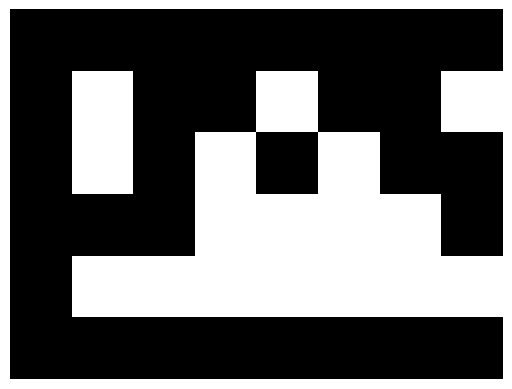

In [1]:
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt

img = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 0, 0, 1, 0, 0, 1],
                [0, 1, 0, 1, 0, 1, 0, 0],
                [0, 0, 0, 1, 1, 1, 1, 0],
                [0, 1, 1, 1, 1, 1, 1, 1],
                [0, 0, 0, 0, 0, 0, 0, 0]])

fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
plt.axis('off')

Here, all the pixels have a value of a `0` or a `1`. Such an image is referred
to as a binary image since it represent just two colors. In a binary image, a
`0` typically corresponds to a black pixel and a `1` to a white pixel (however,
these are just arbitrary pseudo-colors for visualization). 

### Grayscale image
A greyscale image is similar, but each pixel contains a value larger value. The
minimum value of a pixel is always 0, and the maximum value depends on the type
of the image. In the simplest case, let us consider a 2-bit image, where the
largest value is $2^2 = 4$. Here, 0 represents black and 3 represents white,
and 1 and 2 represent shades of gray in between. 

(-0.5, 7.5, 5.5, -0.5)

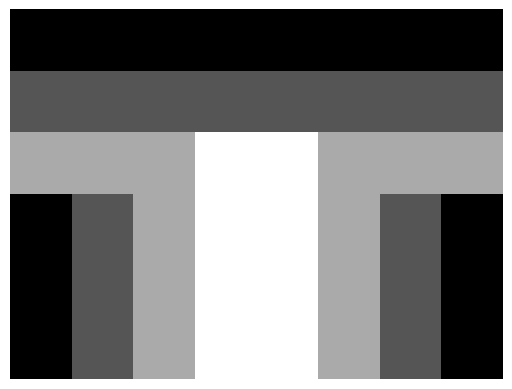

In [2]:
img = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                [1, 1, 1, 1, 1, 1, 1, 1],
                [2, 2, 2, 3, 3, 2, 2, 2],
                [0, 1, 2, 3, 3, 2, 1, 0],
                [0, 1, 2, 3, 3, 2, 1, 0],
                [0, 1, 2, 3, 3, 2, 1, 0]])

fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
plt.axis('off')

In an 8-bit image we can have $2^8 = 256$ distinct values, with 0 being black,
255 being white, and 254 values of gray in between.  Similarly a 16-bit image
can have $2^{16}= 56xuz$ distinct values. Therefore, as the bit-depth of an
image increases we can it can represent an image with more shades of gray.  We
will use a 16bit image as it is the mostly common type use in microscopy,
though all the concepts are identical irrespective of the image type. 

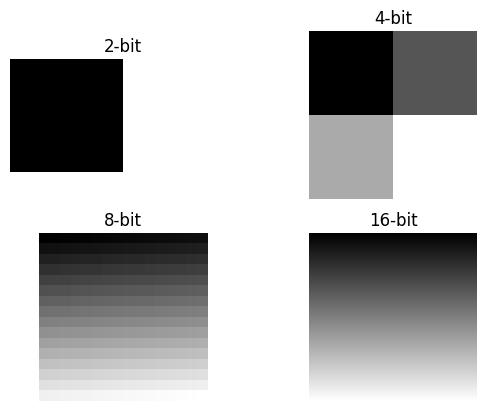

In [3]:
# A 1x2 2-bit image
img_2bit = np.arange(0, 2).reshape(1,2)
# A 2*2 4-bit image
img_4bit = np.arange(0, 4).reshape(2, 2)
# A 16*16 8-bit image
img_8bit = np.arange(0, 256).reshape(16, 16)
# A 256*256 16-bit image
img_16bit = np.arange(0, 65536).reshape(256, 256)


fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img_2bit, cmap='gray')
ax[0, 0].set_title('2-bit')
ax[0, 0].set_axis_off()
ax[0, 1].imshow(img_4bit, cmap='gray')
ax[0, 1].set_title('4-bit')
ax[0, 1].set_axis_off()
ax[1, 0].imshow(img_8bit, cmap='gray')
ax[1, 0].set_title('8-bit')
ax[1, 0].set_axis_off()
ax[1, 1].imshow(img_16bit, cmap='gray')
ax[1, 1].set_title('16-bit')
ax[1, 1].set_axis_off()

## Reading and writing images

Now that we know how to manipulate toy images, let up read in a real image.  We
can read an image using the funcion `io.imread` to read in a image as a numpy
ndarray. All we need is a path the image

(1040, 1392)
uint16


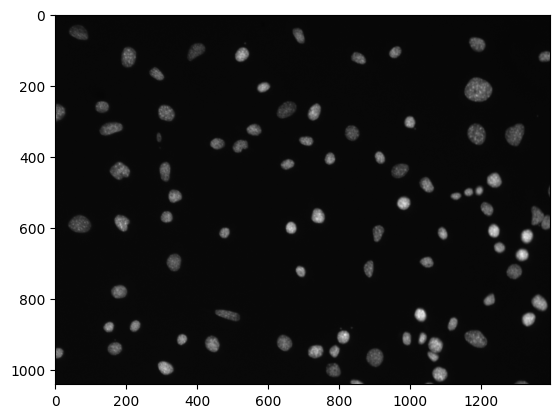

In [17]:
# Read in an image
img = ski.io.imread("data/F01_202w2.TIF")

# we can check the size of the image and the data type
print(img.shape)
print(img.dtype)

# We can similarly view the image using matplotlib

fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')




To write an image we can use the function `io.imsave`, we need the image to
save and the file path.

(-0.5, 1391.5, 1039.5, -0.5)

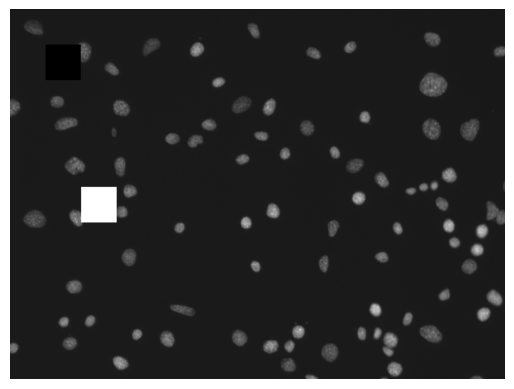

In [16]:
img = ski.io.imread("data/F01_202w2.TIF")


In [6]:
# Save the image

## Indexing and manipulating images

We can index and manipulate an image just like a matrix.
We can similarly manipulate index and manipulate an image just like
manipulating any numpy matrix.



In [ ]:
img1 = ski.io.imread("data/F01_202w2.TIF")
img1[100:200, 100:199] = 0

img1[500:600, 200:300] = 2000

fig, ax = plt.subplots()
ax.imshow(img1, cmap='gray')
plt.axis('off')

In [ ]:

## A note on image formats